## Dimensionality Reduction
### Principal Component Analysis(PCA)

we can apply pca to model before EDA or after model creation to change the accuracy of our model

Dimensionalities are nothing but features,attributes

Dimentional reduction is noting but removing the no of features in a model

To decrease the size of the file

if the size of the file is increases time to train the model is also increses to reduce the time we will use dimensional reduction 

if we add so many variables to model the accuracy may not change or it starts decreasing accuracy

to reduce Curese of dimentionality

In [176]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [177]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import seaborn as sns 
import os
import random
from sklearn.decomposition import PCA
%matplotlib inline
from datetime import time

In [178]:
pca_train = pd.read_table(r'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye',sep =',',header = None)
pca_test = pd.read_table(r'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo',sep=',',header = None)

C:\Users\naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
C:\Users\naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [179]:
os.getcwd()

'C:\\Users\\naveen\\sequence\\Machine Learning'

In [180]:
pca_train.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [181]:
pca_train.shape

(80, 45)

In [182]:
pca_test.shape

(187, 45)

In [183]:
pca_train.rename(columns={0:'Target'},inplace=True)
pca_test.rename(columns={0:'Target'},inplace=True)


In [184]:
pca_train
pca_test

,Target,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
5,1,57,69,68,75,69,74,73,71,57,...,63,58,69,67,79,77,72,70,61,65
6,1,69,66,62,75,67,71,72,76,69,...,69,70,72,72,69,68,70,73,63,59
7,1,61,60,60,62,64,72,68,67,74,...,66,66,66,60,60,58,60,67,49,52
8,1,65,62,67,68,65,67,71,71,64,...,67,63,74,63,77,79,68,70,59,56
9,1,74,73,72,79,66,61,76,66,65,...,64,62,73,69,62,67,60,56,53,46


,Target,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42
5,1,68,63,67,67,65,72,74,72,70,...,70,70,70,67,77,71,77,72,68,59
6,1,80,76,77,76,67,68,71,76,69,...,57,58,62,65,59,45,53,58,54,55
7,1,68,63,62,58,60,57,69,78,59,...,66,67,74,70,77,74,66,60,59,56
8,1,77,61,71,69,70,66,57,55,67,...,48,40,41,39,19,16,68,72,56,65
9,1,69,68,73,74,62,67,74,73,67,...,61,65,76,79,74,73,64,56,53,45


In [185]:
col_names = ['target']
for i in range(1,23):
    col1 = 'F'+str(i)+'R'
    col2 = "F"+str(i)+"S"
    col_names.append(col1)
    col_names.append(col2)
    
col_names

['target',
 'F1R',
 'F1S',
 'F2R',
 'F2S',
 'F3R',
 'F3S',
 'F4R',
 'F4S',
 'F5R',
 'F5S',
 'F6R',
 'F6S',
 'F7R',
 'F7S',
 'F8R',
 'F8S',
 'F9R',
 'F9S',
 'F10R',
 'F10S',
 'F11R',
 'F11S',
 'F12R',
 'F12S',
 'F13R',
 'F13S',
 'F14R',
 'F14S',
 'F15R',
 'F15S',
 'F16R',
 'F16S',
 'F17R',
 'F17S',
 'F18R',
 'F18S',
 'F19R',
 'F19S',
 'F20R',
 'F20S',
 'F21R',
 'F21S',
 'F22R',
 'F22S']

In [186]:
pca_train.columns=col_names
pca_test.columns=col_names


In [187]:
pca_train

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
5,1,57,69,68,75,69,74,73,71,57,...,63,58,69,67,79,77,72,70,61,65
6,1,69,66,62,75,67,71,72,76,69,...,69,70,72,72,69,68,70,73,63,59
7,1,61,60,60,62,64,72,68,67,74,...,66,66,66,60,60,58,60,67,49,52
8,1,65,62,67,68,65,67,71,71,64,...,67,63,74,63,77,79,68,70,59,56
9,1,74,73,72,79,66,61,76,66,65,...,64,62,73,69,62,67,60,56,53,46


In [188]:
pca_train.columns

Index(['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R',
       'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R',
       'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S', 'F14R', 'F14S',
       'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R', 'F18S', 'F19R',
       'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'],
      dtype='object')

In [189]:

y = pca_train.target
Features = ['F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R',
       'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R',
       'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S', 'F14R', 'F14S',
       'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R', 'F18S', 'F19R',
       'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S']
X = pca_train[Features]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)



y1 = pca_test['target']
Features = ['F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R',
       'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R',
       'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S', 'F14R', 'F14S',
       'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R', 'F18S', 'F19R',
       'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S']
X1 = pca_test[Features]

from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.30,random_state=101)


In [190]:
# fiting the dataset to model 
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X,y)


#logmodel = LogisticRegression()
#logmodel.fit(X1,y1)
#logmodel.fit(X_test,y_test)

C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [192]:
predictions_train = logmodel.predict(X)

In [193]:
predictions_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [194]:
import time
logreg = LogisticRegression()
#start time
start = time.time()
#fit model
logreg.fit(pca_train,y)
logreg.fit(pca_test,y1)
#end time 
end = time.time()

training_time = end-start
print('Time taken to train logistic regression :',training_time)

C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Time taken to train logistic regression : 0.05500006675720215


In [195]:
predictions_train = logmodel.predict(X_train)

In [196]:
pca_train['target'].value_counts()

1    40
0    40
Name: target, dtype: int64

In [197]:
pca_test['target'].value_counts()

1    172
0     15
Name: target, dtype: int64

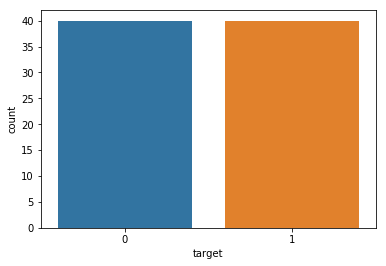

In [198]:
import seaborn as sns
sns.countplot(x=pca_train.target)
#over sampling

In [ ]:
sns.countplot(x=pca_test.target)#under sampling #unbalanced

## 1.Under sampling:majority  class reduce to minority class to make the dataset equal
## 2.over sampling:minority class increses to majority class

## `Under sampling:`


In [200]:
count_class_1,count_class_0 = pca_test.target.value_counts()
print(count_class_1,count_class_0)

172 15


In [218]:
pca_test_class_0.shape

(15, 45)

In [211]:
pca_test_class_1= pca_test[pca_test.target == 1]
pca_test_class_0= pca_test[pca_test.target == 0]


Random Under sampling
1    15
0    15
Name: target, dtype: int64


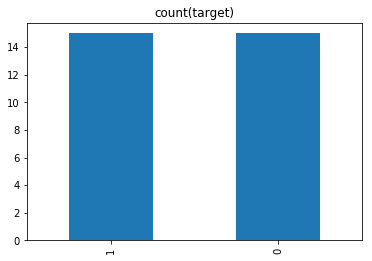

In [212]:
#random under sampling
pca_test_class_1_under=pca_test_class_1.sample(count_class_0, \
                                              random_state=123)
pca_test_under = pd.concat([pca_test_class_0,pca_test_class_1_under], \
                          axis=0)
print('Random Under sampling')
print(pca_test_under.target.value_counts())


pca_test_under.target.value_counts().plot(kind='bar',title = 'count(target)')

In [219]:
pca_test_class_1_under

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
163,1,55,66,58,75,71,77,68,73,63,...,70,74,62,71,67,66,63,61,53,60
42,1,65,67,67,61,55,57,66,74,64,...,63,64,60,61,74,63,59,58,50,49
110,1,76,75,75,77,75,72,75,75,68,...,72,75,65,70,73,71,64,63,50,50
114,1,65,60,71,72,67,72,68,72,54,...,65,70,49,48,73,68,75,74,66,67
145,1,69,65,70,74,64,71,70,74,66,...,65,66,65,68,68,76,67,75,63,61
148,1,64,69,72,82,36,43,72,73,57,...,68,71,59,73,48,74,33,38,13,9
164,1,76,77,69,70,64,69,76,80,50,...,69,70,54,62,64,66,51,42,28,22
151,1,64,51,64,54,70,71,70,72,64,...,71,70,57,53,72,70,67,66,56,52
53,1,73,70,69,75,62,62,67,70,70,...,62,65,62,66,66,62,54,56,44,35
63,1,65,65,71,77,70,68,73,72,68,...,66,59,64,61,63,58,63,54,34,27


In [220]:
pca_test_class_1_under.shape

(15, 45)

In [221]:
pca_test_under

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
172,0,70,72,70,70,65,69,70,65,69,...,69,65,66,71,69,65,78,75,66,63
173,0,66,64,64,66,67,72,72,77,65,...,69,73,76,75,73,75,72,72,62,62
174,0,68,70,69,74,65,70,72,73,71,...,69,67,60,57,69,62,66,75,50,50
175,0,64,58,70,78,66,66,74,72,66,...,62,64,77,71,74,72,74,73,70,59
176,0,58,63,80,71,76,70,70,71,64,...,50,46,58,60,76,73,82,77,65,66
177,0,61,68,62,70,76,79,71,71,73,...,69,69,66,71,67,66,74,71,58,58
178,0,73,80,78,78,75,73,78,75,70,...,65,70,68,69,64,64,63,63,56,51
179,0,56,56,63,66,76,76,68,73,62,...,71,73,60,53,61,73,67,68,59,56
180,0,73,74,65,66,69,69,67,81,65,...,66,69,72,70,74,76,75,72,67,63
181,0,59,58,69,74,71,73,70,68,57,...,66,66,61,56,74,71,72,69,62,60


In [222]:
pca_test_under.shape

(30, 45)

## Over sampling

In [213]:
count_class_1,count_class_0 = pca_test.target.value_counts()
print(count_class_1,count_class_0)

172 15


In [217]:
pca_test_class_0.shape;pca_test_class_1.shape

(15, 45)

(172, 45)

In [204]:
pca_test_class_1= pca_test[pca_test.target == 1]
pca_test_class_0= pca_test[pca_test.target == 0]


Random Under sampling
1    172
0    172
Name: target, dtype: int64


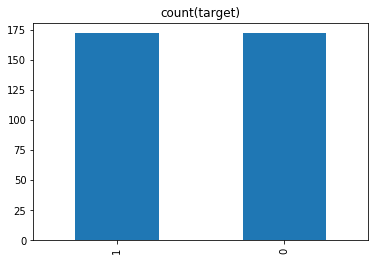

In [205]:
#random over sampling
pca_test_class_0_over=pca_test_class_0.sample(count_class_1,replace=True)
pca_test_over = pd.concat([pca_test_class_1,pca_test_class_0_under], \
                          axis=0)
print('Random Under sampling')
print(pca_test_over.target.value_counts())


pca_test_over.target.value_counts().plot(kind='bar',title = 'count(target)')

In [206]:
pca_train.corr()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
target,1.000000,0.134916,-0.153489,-0.264282,-0.357876,-0.032195,-0.256404,-0.043057,-0.244278,-0.001694,...,-0.081470,-0.211905,-0.017983,-0.182488,-0.375311,-0.526152,-0.353954,-0.394695,-0.378077,-0.327979
F1R,0.134916,1.000000,0.459985,0.245528,0.174106,0.035401,-0.048772,0.259527,0.119893,0.256918,...,-0.110412,-0.062266,0.032394,0.022848,-0.065124,-0.141432,-0.268222,-0.258516,-0.299482,-0.255024
F1S,-0.153489,0.459985,1.000000,0.298719,0.426246,-0.022179,0.143192,0.141931,0.527893,0.175323,...,0.026635,0.167284,0.051393,0.245041,-0.098247,0.190643,-0.326514,-0.157758,-0.244421,-0.163147
F2R,-0.264282,0.245528,0.298719,1.000000,0.689725,0.194395,0.142732,0.198584,0.123432,0.263416,...,0.004787,0.133670,0.137993,0.329877,0.237774,0.235111,0.172000,0.115048,0.119397,0.104358
F2S,-0.357876,0.174106,0.426246,0.689725,1.000000,0.100561,0.268939,0.097297,0.277806,0.281373,...,-0.049294,0.140644,0.221376,0.367199,0.224243,0.368773,0.174930,0.168973,0.151582,0.134198
F3R,-0.032195,0.035401,-0.022179,0.194395,0.100561,1.000000,0.391196,0.298236,-0.190983,0.108280,...,-0.172088,-0.212272,-0.033659,-0.045265,0.045766,-0.115675,0.256555,0.167622,0.045872,0.081601
F3S,-0.256404,-0.048772,0.143192,0.142732,0.268939,0.391196,1.000000,0.069102,0.250682,-0.112457,...,-0.222590,-0.121295,-0.076678,-0.017747,-0.099383,0.144817,0.195776,0.416009,0.118328,0.236851
F4R,-0.043057,0.259527,0.141931,0.198584,0.097297,0.298236,0.069102,1.000000,0.322533,0.184970,...,0.021602,-0.009432,0.076957,0.089118,0.124195,0.033364,-0.112433,-0.260397,-0.194039,-0.264163
F4S,-0.244278,0.119893,0.527893,0.123432,0.277806,-0.190983,0.250682,0.322533,1.000000,-0.013193,...,0.065975,0.292425,0.050660,0.206281,-0.043832,0.307883,-0.119309,0.057758,-0.000252,0.019310
F5R,-0.001694,0.256918,0.175323,0.263416,0.281373,0.108280,-0.112457,0.184970,-0.013193,1.000000,...,0.385381,0.477264,0.463289,0.516904,0.357610,0.253032,0.102060,-0.061584,0.022569,-0.147706


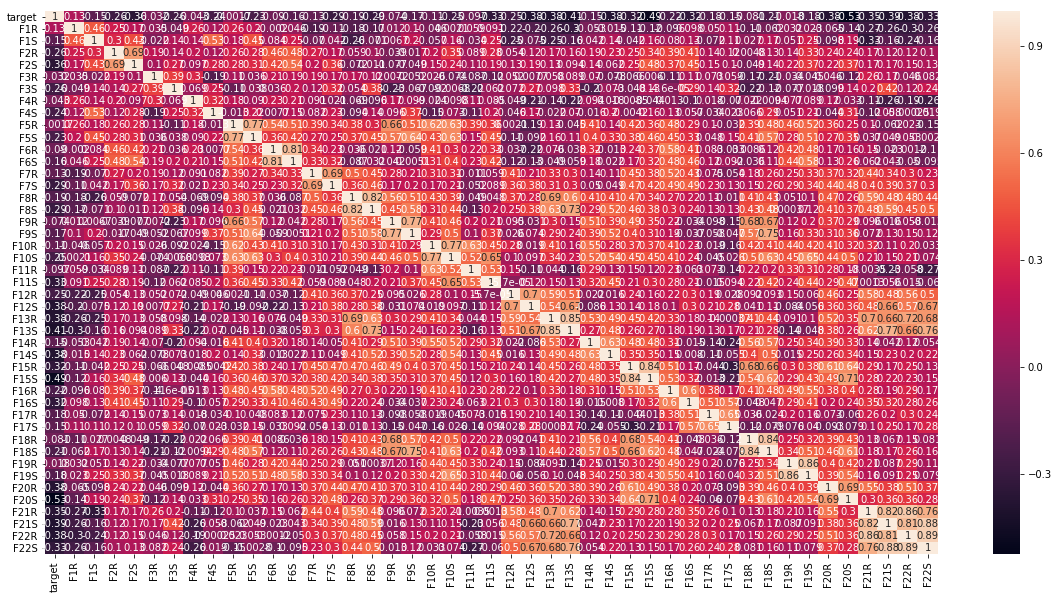

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(pca_train.corr(),annot=True);

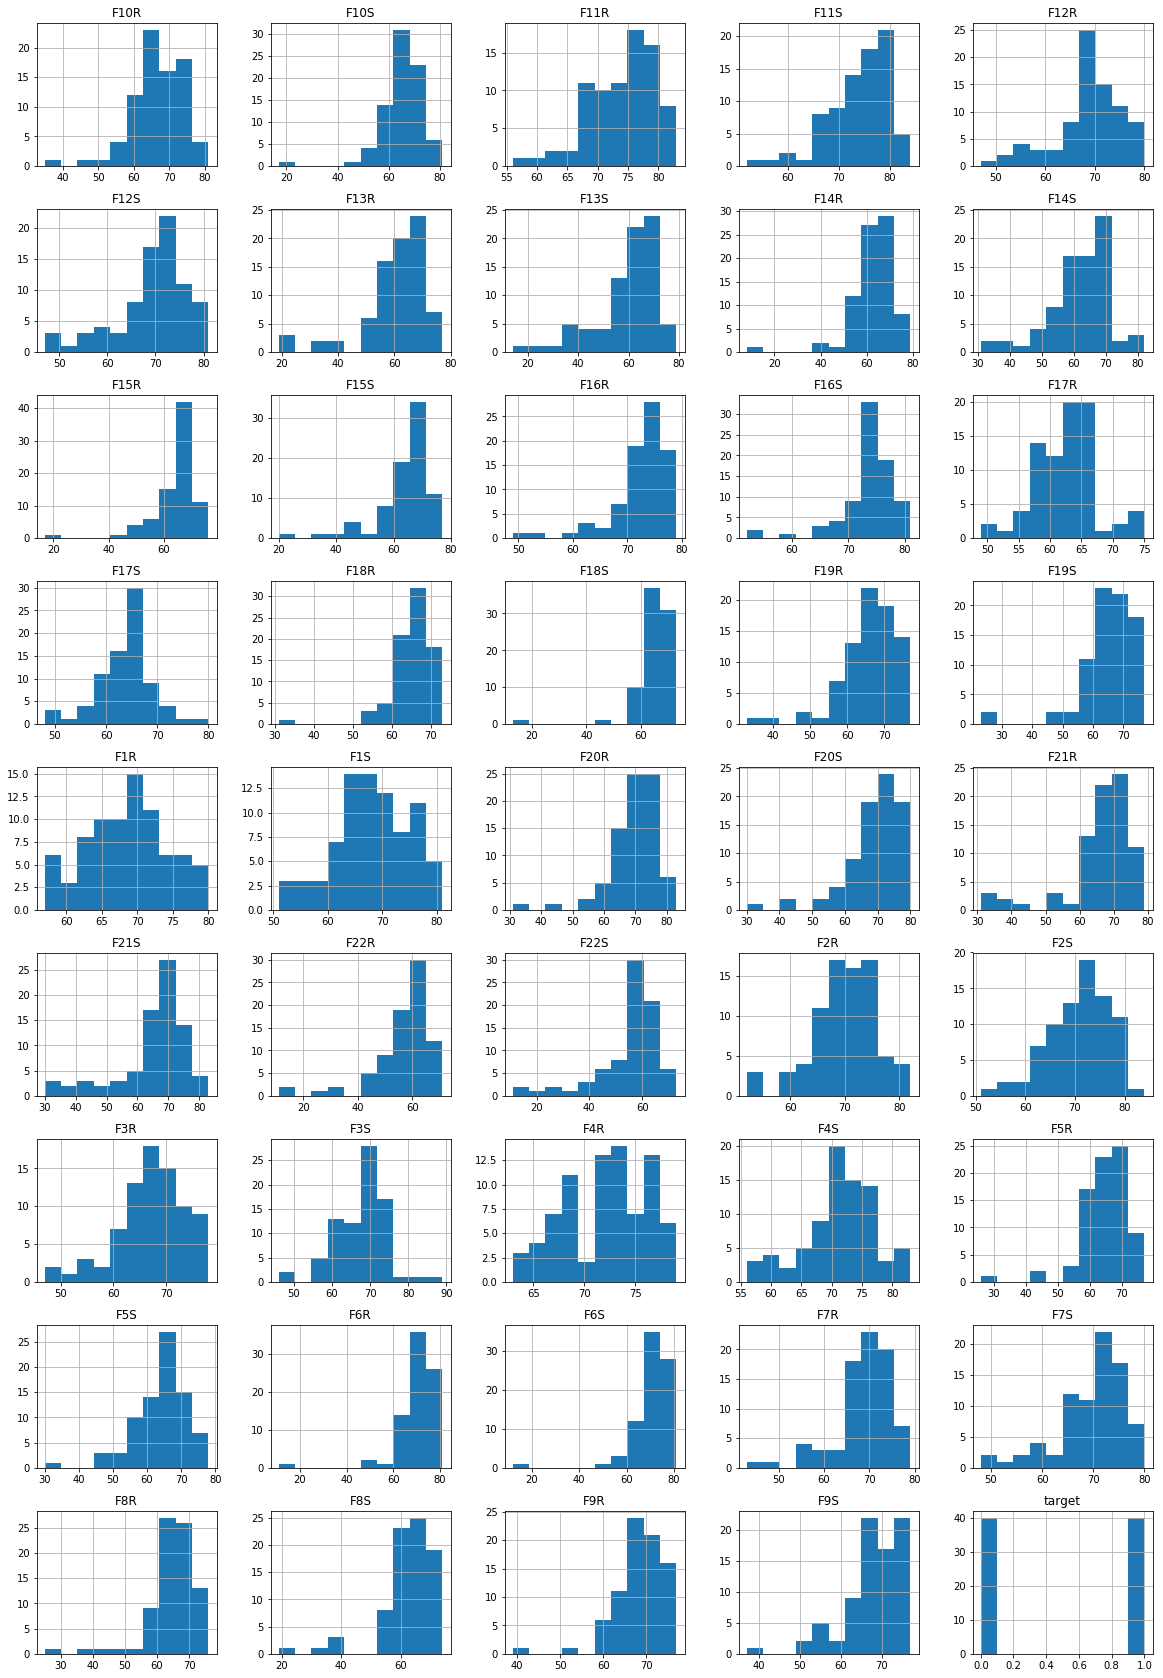

In [208]:
pca_train.hist(bins=10,figsize=(20,30),layout=(9,5));

# 4.Spliting labels and Features

In [209]:
target = pca_train['target']
#y_train
pca_train.drop('target',axis=1,inplace=True)#X_train


target_test = pca_test_under[pca_test['target']
#y_test
pca_test_under.drop(pca_test['target'],axis=1,inplace=True)#X_test


SyntaxError: invalid syntax (<ipython-input-209-b47037cf9ec9>, line 8)